In [1]:
import pandas as pd
import geopandas as gpd
import folium 
import matplotlib.pyplot as plt
import mapclassify
import numpy as np
import contextily as cx
%config InlineBackend.figure_format ='retina'

In [2]:
# mapping raw mobility data + others

H11April = pd.read_csv('../urabanfarms/H11month4filteredMobilityData.csv')
F13April = pd.read_csv('../urabanfarms/F13month4filteredMobilityData.csv')
E14April = pd.read_csv('../urabanfarms/E14month4filteredMobilityData.csv')
F11April = pd.read_csv('../urabanfarms/F11month4filteredMobilityData.csv')
F12April = pd.read_csv('../urabanfarms/F12month4filteredMobilityData.csv')
G12April = pd.read_csv('../urabanfarms/G12month4filteredMobilityData.csv')
G13April = pd.read_csv('../urabanfarms/G13month4filteredMobilityData.csv')
G11April = pd.read_csv('../urabanfarms/G11month4filteredMobilityData.csv')
G14April = pd.read_csv('../urabanfarms/G14month4filteredMobilityData.csv')
H13April = pd.read_csv('../urabanfarms/H13month4filteredMobilityData.csv')
H14April = pd.read_csv('../urabanfarms/H14month4filteredMobilityData.csv')
H12April = pd.read_csv('../urabanfarms/H12month4filteredMobilityData.csv')
E12April = pd.read_csv('../urabanfarms/E12month4filteredMobilityData.csv')
E13April = pd.read_csv('../urabanfarms/E13month4filteredMobilityData.csv')
F14April = pd.read_csv('../urabanfarms/F14month4filteredMobilityData.csv')
E11April = pd.read_csv('../urabanfarms/E11month4filteredMobilityData.csv')

In [3]:
FullApril = H11April.merge(F13April, how = 'outer').merge(F14April, how = 'outer').merge(F11April, how = 'outer').merge(F12April, how = 'outer').merge(G12April, how = 'outer').merge(G13April, how = 'outer').merge(G11April, how = 'outer').merge(G14April, how = 'outer').merge(H13April, how = 'outer').merge(H14April, how = 'outer').merge(H12April, how = 'outer').merge(E12April, how = 'outer').merge(E13April, how = 'outer').merge(E14April, how = 'outer').merge(E11April, how = 'outer')

In [15]:
FullApril

Unnamed: 0 Polygon_ID                                 Device_ID  \
0                 0        R15  9d237d6b49394eba7ed1ac2d447e3a51de77143b   
1                44        D15  95754d9ce7a34435ff6486ab755c94c50d9df856   
2                45        C14  95754d9ce7a34435ff6486ab755c94c50d9df856   
3                73        O17  9ec3e45b1d8131b84e0bad8f664714f8979131c4   
4                75        P16  9ec3e45b1d8131b84e0bad8f664714f8979131c4   
...             ...        ...                                       ...   
4972219      998121         B3  e96488aba870839395777c81abc4752a8dcfb2b1   
4972220      998122         B3  e96488aba870839395777c81abc4752a8dcfb2b1   
4972221      998123         B3  e96488aba870839395777c81abc4752a8dcfb2b1   
4972222      998124         B3  e96488aba870839395777c81abc4752a8dcfb2b1   
4972223      998125         C3  e96488aba870839395777c81abc4752a8dcfb2b1   

               Lat        Lon  Unix Timestamp                   DateTime  \
0        32.862010 -96.901359    1.617568e+09  2021-04-04 20:23:28+00:00   
1        32.941372 -96.902926    1.617472e+09  2021-04-03 17:46:45+00:00   
2        32.951766 -96.909409    1.617472e+09  2021-04-03 17:47:32+00:00   
3        32.881021 -96.890760    1.617471e+09  2021-04-03 17:37:44+00:00   
4        32.872922 -96.898426    1.617476e+09  2021-04-03 18:51:18+00:00   
...            ...        ...             ...                        ...   
4972219  32.952774 -96.871261    1.618070e+09  2021-04-10 15:48:27+00:00   
4972220  32.952778 -96.871261    1.618070e+09  2021-04-10 15:57:27+00:00   
4972221  32.952776 -96.871270    1.618071e+09  2021-04-10 16:03:40+00:00   
4972222  32.952637 -96.870863    1.618072e+09  2021-04-10 16:32:25+00:00   
4972223  32.948107 -96.871251    1.618072e+09  2021-04-10 16:34:26+00:00   

                              Date Day Of Week                      geometry  
0        2021-04-04 00:00:00+00:00      Sunday   POINT (-96.901359 32.86201)  
1        2021-04-03 00:00:00+00:00    Saturday  POINT (-96.902926 32.941372)  
2        2021-04-03 00:00:00+00:00    Saturday  POINT (-96.909409 32.951766)  
3        2021-04-03 00:00:00+00:00    Saturday   POINT (-96.89076 32.881021)  
4        2021-04-03 00:00:00+00:00    Saturday  POINT (-96.898426 32.872922)  
...                            ...         ...                           ...  
4972219  2021-04-10 00:00:00+00:00    Saturday  POINT (-96.871261 32.952774)  
4972220  2021-04-10 00:00:00+00:00    Saturday  POINT (-96.871261 32.952778)  
4972221  2021-04-10 00:00:00+00:00    Saturday   POINT (-96.87127 32.952776)  
4972222  2021-04-10 00:00:00+00:00    Saturday  POINT (-96.870863 32.952637)  
4972223  2021-04-10 00:00:00+00:00    Saturday  POINT (-96.871251 32.948107)  

[4972224 rows x 10 columns]

In [4]:
geoFullApril = gpd.GeoDataFrame(FullApril, geometry = gpd.points_from_xy(FullApril['Lon'], FullApril['Lat']))

In [6]:
FoodDesert = gpd.read_file('../urabanfarms/FARADallas.shp')

In [7]:
CommBasket = gpd.read_file('../urabanfarms/Community_Basket_Locations_2021.shp')
FastFood = gpd.read_file('../urabanfarms/Dallas_County_Top_Ten_Fast_Food_Locations.shp')
Library = gpd.read_file('../urabanfarms/libraries_in_or_near_food_deserts.shp')
RecCenter = gpd.read_file('../urabanfarms/rec_centers_in_or_near_food_deserts.shp')
UrbanGarden = gpd.read_file('../urabanfarms/UrbanGardensNov2022_Geo.shp')
YMCA = gpd.read_file('../urabanfarms/YMCA_in_or_near_Food_Deserts.shp')

In [8]:
FoodDesert = FoodDesert.to_crs(epsg=3857)
CommBasket = CommBasket.to_crs(epsg=3857)
FastFood = FastFood.to_crs(epsg=3857)
Library = Library.to_crs(epsg=3857)
RecCenter = RecCenter.to_crs(epsg=3857)
UrbanGarden = UrbanGarden.to_crs(epsg=3857)
YMCA = YMCA.to_crs(epsg=3857)

In [5]:
if geoFullApril.crs is None:
    geoFullApril.set_crs(epsg=4326, inplace=True)

geoFullApril = geoFullApril.to_crs(epsg=3857)

/tmp/ipykernel_497477/3103137859.py:1: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  base = FoodDesert[FoodDesert['LILA Low V'] == 1].plot('LILA Low V', figsize=(10,10), color = 'orange', alpha = 0.3);


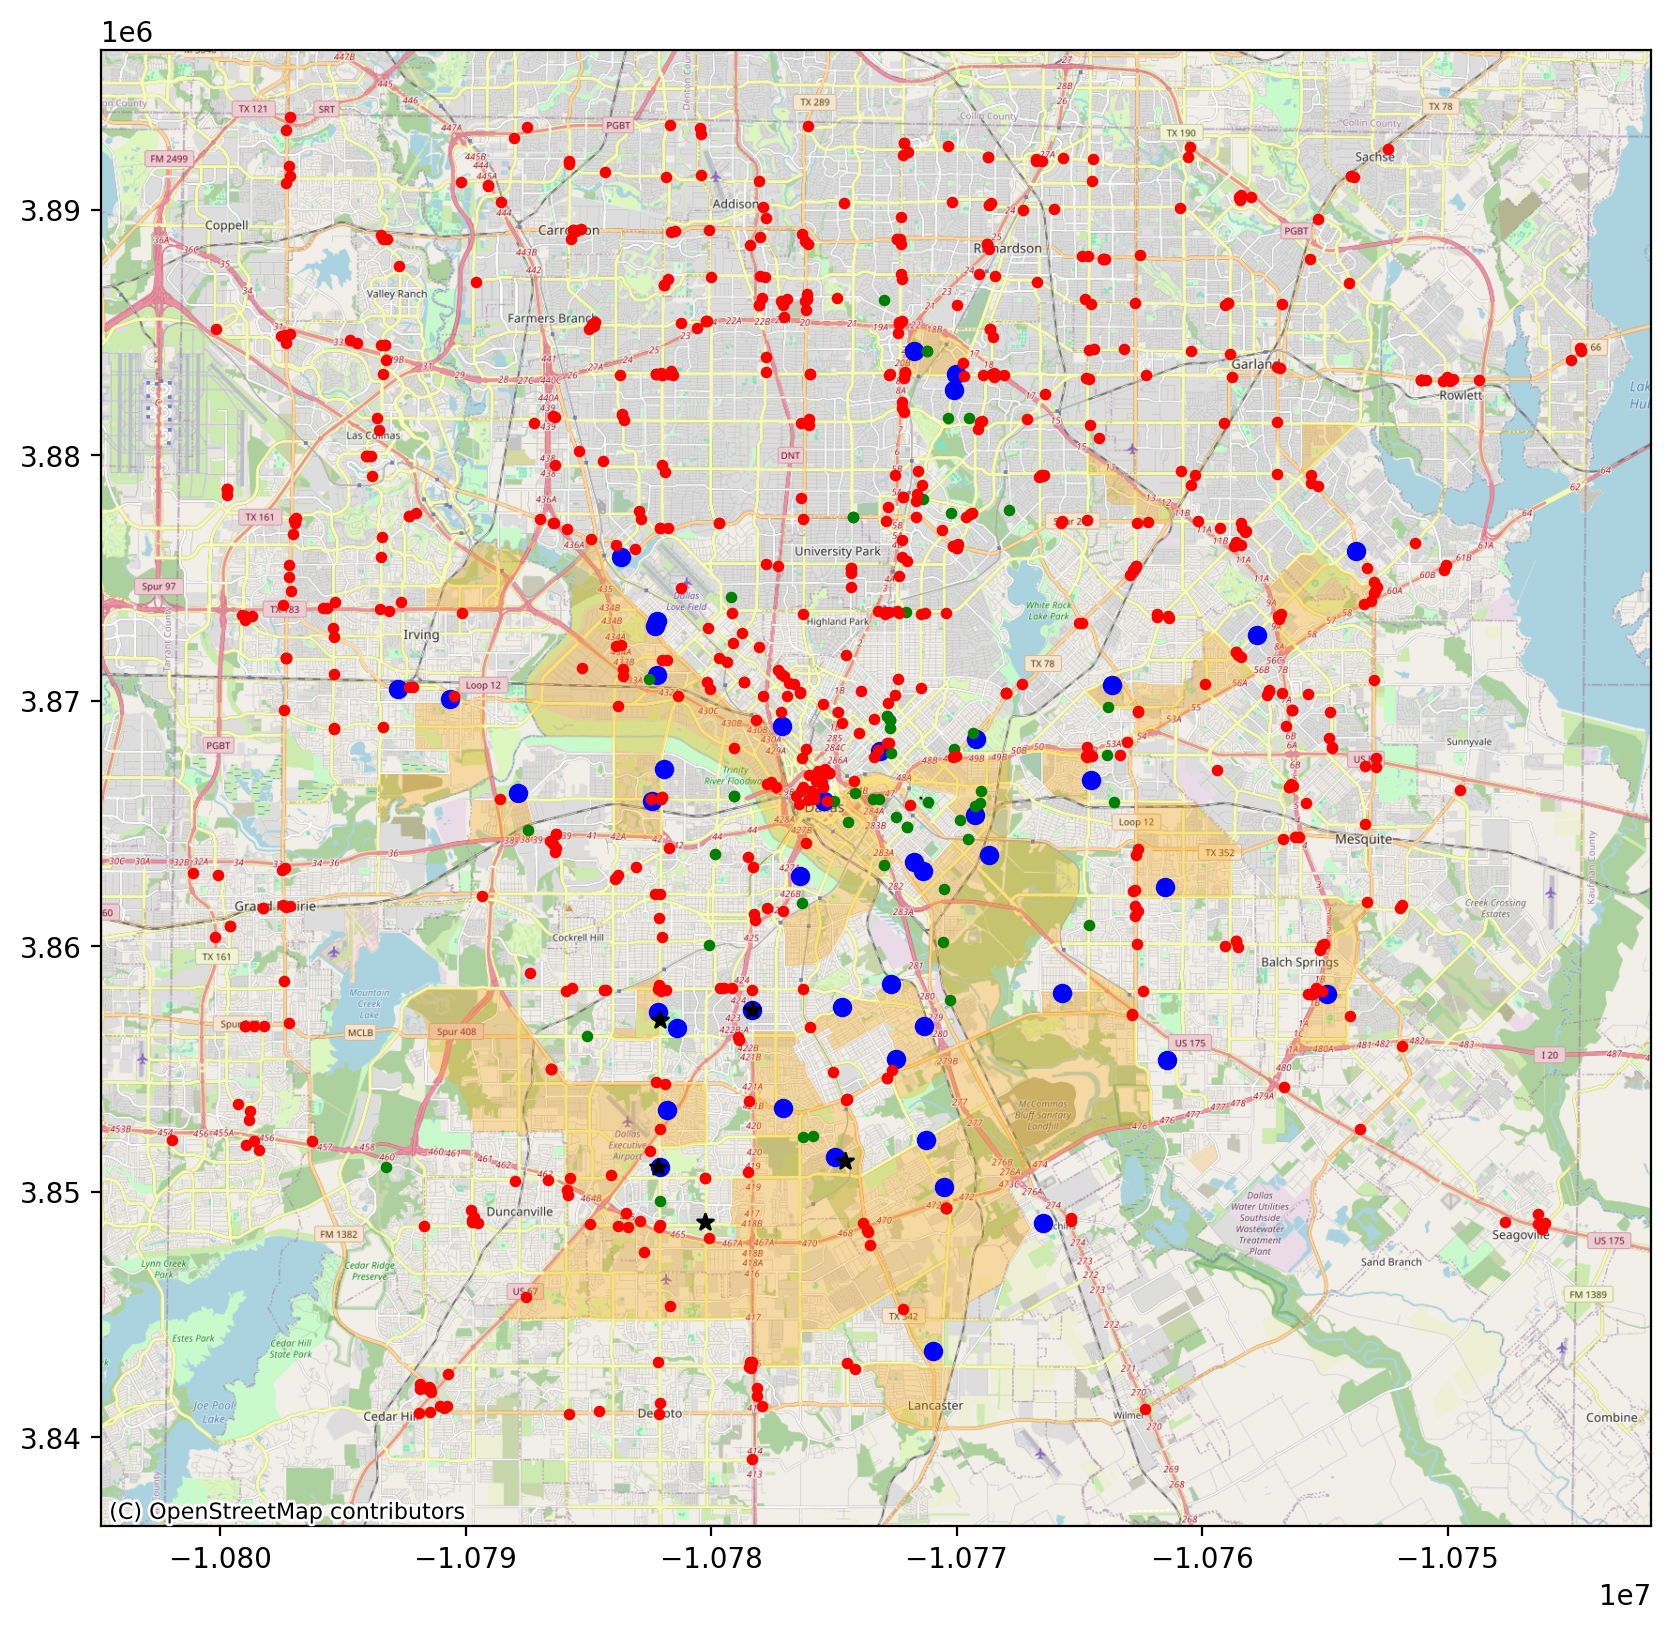

In [26]:
base = FoodDesert[FoodDesert['LILA Low V'] == 1].plot('LILA Low V', figsize=(10,10), color = 'orange', alpha = 0.3);

Library.plot(ax = base, color = 'blue');
RecCenter.plot(ax = base, color = 'blue');
YMCA.plot(ax = base, color = 'blue');
UrbanGarden.plot(ax = base, color = 'green', markersize = 10)
CommBasket.plot(ax = base, color = 'black', marker = '*');
FastFood.plot(ax = base, color = 'red', markersize = 10);

cx.add_basemap(base, source = cx.providers.OpenStreetMap.Mapnik, zoom = 12);

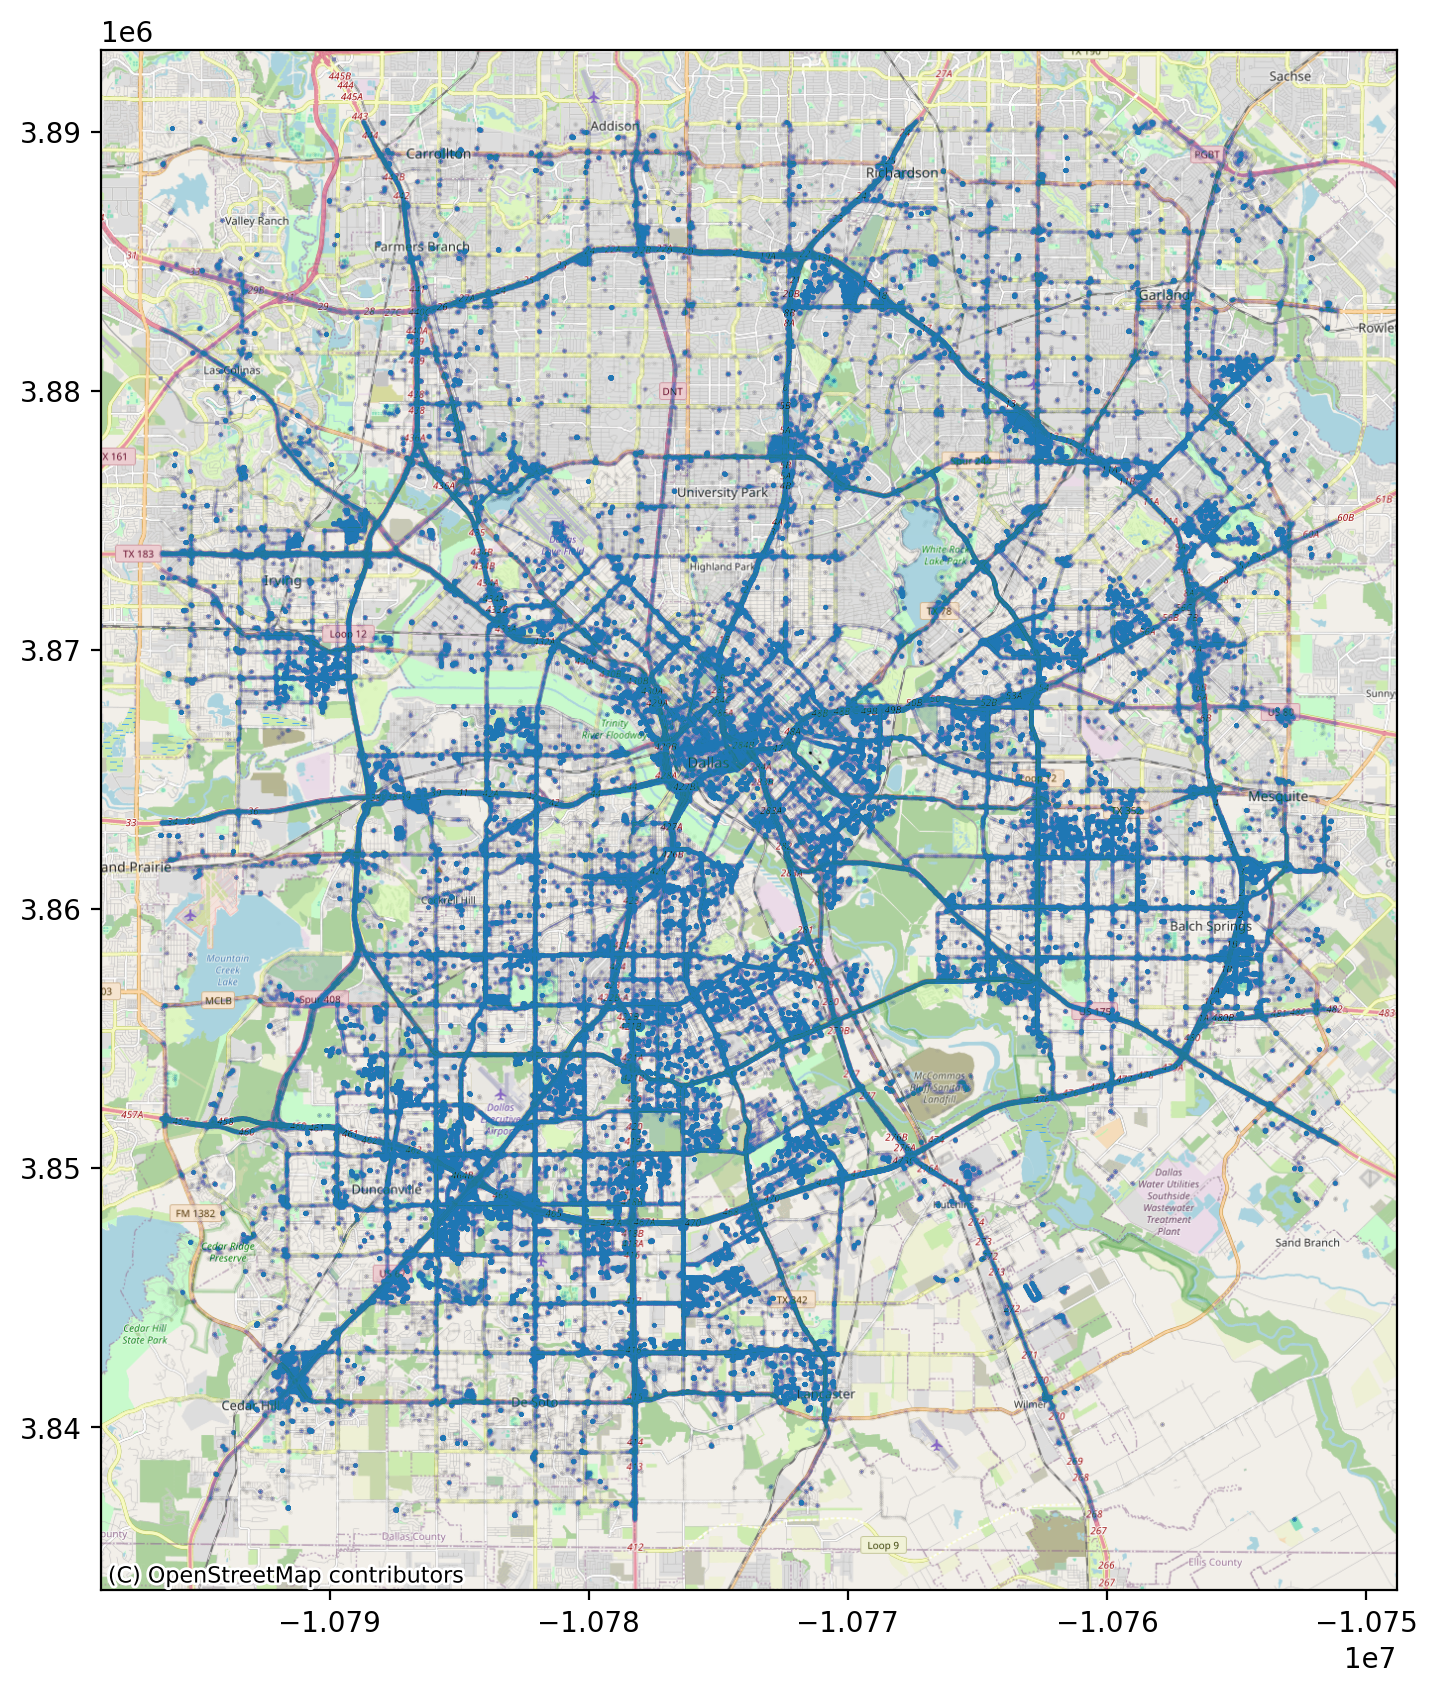

In [6]:
full = geoFullApril.plot(alpha = 0.005, markersize = 1, figsize=(10,10));
cx.add_basemap(full, source = cx.providers.OpenStreetMap.Mapnik, zoom = 12);
plt.savefig('mobilitymap.png')